In [1]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator
from sklearn.preprocessing import StandardScaler
boston = load_boston()


In [2]:
print(boston.data.shape)

(506, 13)


In [3]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [4]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
import pandas as pd
bos = pd.DataFrame(boston.data)
print(bos.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [7]:
bos['PRICE'] = boston.target

X = bos.drop('PRICE', axis = 1)
Y= bos['PRICE']

In [8]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(339, 13)
(167, 13)
(339,)
(167,)


C:\Users\Dileep\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Linear Regression using Sk-learn

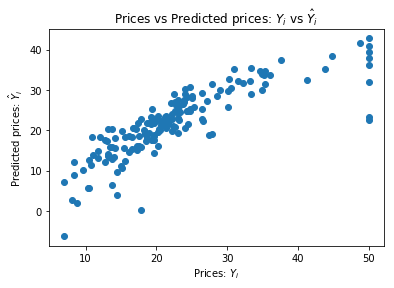

In [9]:
# code source:https://medium.com/@haydar_ai/learning-data-science-day-9-linear-regression-on-boston-housing-dataset-cd62a80775ef
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [10]:
print(np.sqrt(mean_squared_error(Y_test, Y_pred)))

5.34241212146901


In [12]:
scaler = StandardScaler() # The idea behind StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1.
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# linear regression using SGD

In [77]:
class SGDLinearRegression(BaseEstimator):
    
    def __init__(self,max_iter=1000, lrrate=0.0001, tol=0.0001, batch_size=50):
        self.max_iter = max_iter
        self.lrrate = lrrate
        self.tol = tol
        self.batch_size = batch_size
        
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        
        rows, features = X.shape
        
        # Initialize coef and intercept
        self.coef_ = np.zeros(features)
        self.intercept_ = 0.0
        
        self.optimize(X, y)
        return self
    
    def predict(self, X):
        return X.dot(self.coef_) + self.intercept_
    def sample(self, X, y):
        """
        returns a random sample of rows
        """
        idx = np.random.randint(X.shape[0], size=self.batch_size)
        return X[idx,:], y[idx]
    
    def optimize(self, X, y):
        """
        Optimizes the coef_ and intercept
        for lower squared errors
        """
        for i in range(1, self.max_iter + 1):
            
            # Save previous
            prev_coef = self.coef_
            prev_intercept = self.intercept_
            
            # Take a sample
            X_sample, y_sample = self.sample(X, y)
            
            
            pred = self.predict(X_sample)
            diff = y_sample - pred
            
            
            # compute gradients
            coef_grad = -2 * np.dot(X_sample.T, diff)
            intercept_grad = -2 * np.sum(diff)
            
            # update coef_ and intercept
            self.coef_ = self.coef_ - (self.lrrate / i) * coef_grad
            self.intercept_ = self.intercept_ - (self.lrrate / i) * intercept_grad
            # Compute diff of intercept and coef
            coef_diff = np.linalg.norm(self.coef_ - prev_coef)
            intercept_diff = self.intercept_ - prev_intercept
            
            # if diff is less than tolerence then terminate
            if coef_diff < self.tol and intercept_diff < self.tol:
                break

In [78]:
model = SGDLinearRegression(lrrate=0.005)
model.fit(X_scaled, y)

SGDLinearRegression(batch_size=50, lrrate=0.005, max_iter=1000, tol=0.0001)

In [79]:
pred = model.predict(X_test_scaled)
print('Root means score', np.sqrt(mean_squared_error(Y_test, pred)))


Root means score 5.604443895011401


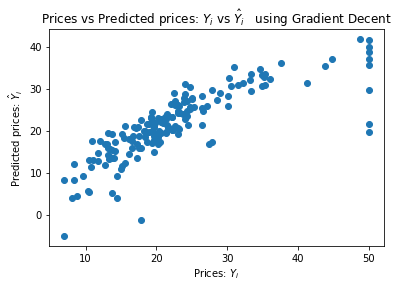

In [80]:
plt.scatter(Y_test, pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$   using Gradient Decent")
plt.show()

# Conclusion

1.Root mean Square Error for linear Regression using sk-learn is 5.34241212146901

2.Root mean Square Error for linear Regression using mini batch SGD is 5.604443895011401

3.Both are slightly Differ from each other